In [1]:
from datasets import load_dataset
import pandas as pd
import spacy as sp
from spacy.lang.en.stop_words import STOP_WORDS
import numpy as np


import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis.gensim
import pyLDAvis
from nltk.stem import WordNetLemmatizer


import numpy as np
import pandas as pd
from collections import defaultdict

from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [3]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from IPython.display import display

In [4]:
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [5]:
# view the col context fully...

pd.set_option('display.max_colwidth', None)

In [6]:
ds = load_dataset("Amod/mental_health_counseling_conversations")

In [7]:
df = ds['train'].to_pandas()

In [8]:
unique_contexts = df['Context'].drop_duplicates()

In [9]:
unique_contexts_list = unique_contexts.tolist()

In [15]:
documents = unique_contexts_list

In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shafayetulislam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
len(stop_words)

179

In [19]:
texts = [[word for word in document.split() if word not in stop_words]
         for document in documents]

In [20]:
 # remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

In [21]:
# Create the dictionary
dictionary = corpora.Dictionary(texts)

In [22]:
# Filter out words that occur less than X documents, 
# or more than X% of the documents.
dictionary.filter_extremes(no_below=50, no_above=0.5)

In [23]:
# Create the corpus.  This is a Term Frequency 
# or Bag of Words representation.
corpus = [dictionary.doc2bow(text) for text in texts]

In [24]:
print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 88
Number of documents: 995


In [25]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)

In [26]:
NUM_TOPICS = 10
chunksize = 2000
passes = 6
iterations = 100
eval_every = 1
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

2024-11-23 14:23:49,539 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-11-23 14:23:49,541 : INFO : using serial LDA version on this node
2024-11-23 14:23:49,545 : INFO : running online (multi-pass) LDA training, 10 topics, 6 passes over the supplied corpus of 995 documents, updating model once every 995 documents, evaluating perplexity every 995 documents, iterating 100x with a convergence threshold of 0.001000
2024-11-23 14:23:49,546 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-11-23 14:23:49,548 : DEBUG : bound: at document #0
2024-11-23 14:23:49,688 : INFO : -5.399 per-word bound, 42.2 perplexity estimate based on a held-out corpus of 995 documents with 10973 words
2024-11-23 14:23:49,688 : INFO : PROGRESS: pass 0, at document #995/995
2024-11-23 14:23:49,688 : DEBUG : performing inference on a chunk of 995 documents
2024-11-23 14:23:49,

In [27]:
def compute_coherence_values(dictionary, corpus, texts, 
                             cohere, limit, start=2, step=2):

    coherence_values = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics,
                         chunksize=chunksize,
                         alpha='auto',
                         eta='auto',
                         iterations=iterations,
                         passes=passes,
                         eval_every=eval_every,
                         random_state=42,)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence=cohere)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [28]:
limit=50
start=2
step=2

In [29]:
coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            texts=texts, 
                                            cohere='c_v', 
                                            start=start, 
                                            limit=limit, 
                                            step=step)

2024-11-23 14:25:35,158 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2024-11-23 14:25:35,160 : INFO : using serial LDA version on this node
2024-11-23 14:25:35,161 : INFO : running online (multi-pass) LDA training, 2 topics, 6 passes over the supplied corpus of 995 documents, updating model once every 995 documents, evaluating perplexity every 995 documents, iterating 100x with a convergence threshold of 0.001000
2024-11-23 14:25:35,161 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-11-23 14:25:35,163 : DEBUG : bound: at document #0
2024-11-23 14:25:35,434 : INFO : -4.954 per-word bound, 31.0 perplexity estimate based on a held-out corpus of 995 documents with 10973 words
2024-11-23 14:25:35,434 : INFO : PROGRESS: pass 0, at document #995/995
2024-11-23 14:25:35,435 : DEBUG : performing inference on a chunk of 995 documents
2024-11-23 14:25:35,652 : DEBUG : 565/995 documents converged

2024-11-23 14:27:50,126 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-23 14:27:50,128 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-23 14:27:50,129 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-23 14:27:50,129 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral

2024-11-23 14:27:50,299 : DEBUG : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-11-23 14:27:50,309 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-23 14:27:50,319 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-23 14:27:50,321 : DEBUG : findfont: score(FontEntry(fname='/Users/shafayetulislam/Documents/mentalHealthTM/mentalHealthTMenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral

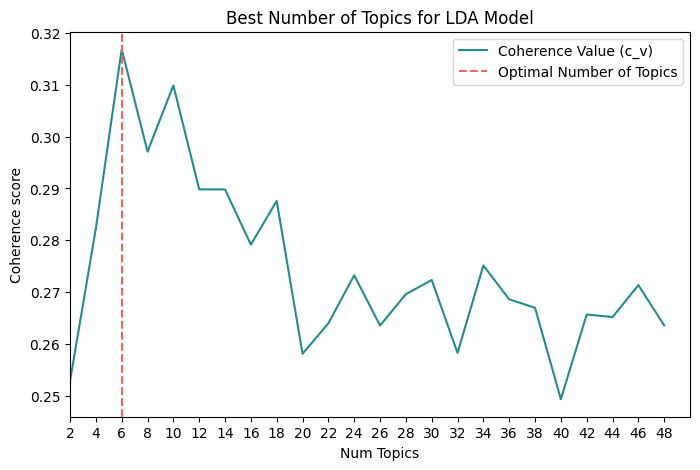

In [30]:
plt.figure(figsize=(8,5))

# Create a custom x-axis
x = range(start, limit, step)

# Build the line plot
ax = sns.lineplot(x=x, y=coherence_values, color='#238C8C')

# Set titles and labels
plt.title("Best Number of Topics for LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xlim(start, limit)
plt.xticks(range(2, limit, step))

# Add a vertical line to show the optimum number of topics
plt.axvline(x[np.argmax(coherence_values)], 
            color='#F26457', linestyle='--')

# Draw a custom legend
legend_elements = [Line2D([0], [0], color='#238C8C', 
                          ls='-', label='Coherence Value (c_v)'),
                   Line2D([0], [1], color='#F26457', 
                          ls='--', label='Optimal Number of Topics')]

ax.legend(handles=legend_elements, loc='upper right')

In [33]:
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=100,
    num_topics=10,
    passes=10,
    eval_every=None)

2024-11-23 14:31:13,455 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-11-23 14:31:13,458 : INFO : using serial LDA version on this node
2024-11-23 14:31:13,460 : INFO : running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 995 documents, updating model once every 995 documents, evaluating perplexity every 0 documents, iterating 100x with a convergence threshold of 0.001000
2024-11-23 14:31:13,461 : INFO : PROGRESS: pass 0, at document #995/995
2024-11-23 14:31:13,461 : DEBUG : performing inference on a chunk of 995 documents
2024-11-23 14:31:13,582 : DEBUG : 969/995 documents converged within 100 iterations
2024-11-23 14:31:13,584 : INFO : optimized alpha [0.078442916, 0.0811024, 0.07588251, 0.09173443, 0.0856236, 0.098867476, 0.08379522, 0.077481456, 0.08048394, 0.07549816]
2024-11-23 14:31:13,584 : DEBUG : updating topics
2024-11-23 14:31:13,584 : INFO : topic #9 (0.075): 0.057*"My" + 0.041*"

In [34]:
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary, sort_topics=True)

pyLDAvis.display(lda_viz)

2024-11-23 14:31:16,522 : DEBUG : performing inference on a chunk of 995 documents
2024-11-23 14:31:16,593 : DEBUG : 994/995 documents converged within 100 iterations


In [12]:
def simple_preprocess(text):
    """
    Simple preprocessing function without relying on NLTK
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Split on whitespace
    tokens = text.split()
    
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    
    return ' '.join(tokens)

In [26]:
def perform_topic_modeling(texts, n_topics=5):
    """
    Perform topic modeling using both LDA and NMF
    """
    # Preprocess texts
    processed_texts = [simple_preprocess(text) for text in texts]
    
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(
        max_features=1000,
        min_df=2,
        max_df=0.95
    )
    dtm = vectorizer.fit_transform(processed_texts)
    
    # Perform LDA
    lda_model = LatentDirichletAllocation(
        n_components=n_topics,
        random_state=42,
        max_iter=20
    )
    
    # Fit LDA model
    doc_topics = lda_model.fit_transform(dtm)
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top words for each topic
    n_top_words = 10
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        topics.append({
            'topic_id': topic_idx,
            'words': top_words
        })
    
    # Create dictionary and corpus
    dictionary = Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    visualize_interactive_lda(lda_model, corpus, dictionary)
    
    return {
        'doc_topics': doc_topics,
        'topics': topics,
        'model': lda_model,
        'vectorizer': vectorizer,
        'processed_texts': processed_texts
    }

In [22]:
# Test with your data
def analyze_mental_health_topics(text_list):
    """
    Analyze mental health conversations and print topics
    """
    print("Starting analysis...")
    results = perform_topic_modeling(text_list, n_topics=10)
    
    print("\nDiscovered Topics:")
    for topic in results['topics']:
        print(f"\nTopic {topic['topic_id'] + 1}:")
        print(", ".join(topic['words']))
        
    return results

In [21]:
results = analyze_mental_health_topics(unique_contexts_list)

Starting analysis...

Discovered Topics:

Topic 1:
men, voices, therapy, abuse, remember, dealing, shake, learn, enough, far

Topic 2:
ask, drinking, see, lonely, daughter, husband, doctor, talking, pictures, second

Topic 3:
like, feel, want, always, know, time, never, things, really, talk

Topic 4:
done, depressed, thinks, act, attracted, dependent, causing, type, angry, concerned

Topic 5:
sexual, job, says, worker, fall, counseling, social, help, past, co

Topic 6:
depression, anxiety, names, help, stress, counseling, deal, mood, doctor, violent

Topic 7:
feel, like, get, want, know, years, love, time, relationship, think

Topic 8:
counselor, child, fight, wife, mother, lazy, client, parent, chance, sad

Topic 9:
difficult, feel, listen, order, trust, cannot, age, listening, approach, seems

Topic 10:
disorder, therapist, brother, friends, understand, two, gets, really, family, never


In [ ]:


# Assuming you have your LDA model, corpus, and dictionary


In [35]:


# Visualize with pyLDAvis
# visualize_interactive_lda(lda_model, corpus, dictionary)